# **Finance Basics in Python**




### **Overview / Objectives**

The purpose of this exercise is to explore some Python skills relating to the following:

1. Reading Data
2. Exploratory Data Analysis / Cleaning and Preparing Data
3. Data Visualization

At the end of our exercise, we will try to answer these questions regarding our data set:

4. Questions
  - Which sector had the highest total return?
  - Which sector had the lowest total return?
  - Which sector is the most volatile?
  - Which day was the best for each sector?
  - Which day was the worst for each sector?


### **Data Overview**

Given my background in finance, I decided to explore this brief project through the lens of the stock market. Luckily, the financial world is full of data - all of which is rather easily accesible.


For our analysis, we will be analyzing the price history of various S&P sector ETFs. In short, these funds track the overall trends of specific markets - Real Estate, Telecom, etc. If you'd like to know more about ETFs let me know and I would be glad to elaborate. Here is anoher reseource in case you would like to learn more:

* [Investopedia - What is an ETF?](https://www.investopedia.com/terms/e/etf.asp)

The datasets we will explore are listed below. If you would like to know more about what each index actually represents, feel free to click the link which will take you to Morningstar - a great website for financial information.

* [S&P Consumer Staples Select Sector (XLP)](https://www.morningstar.com/etfs/arcx/xlp/quote)
* [S&P Energy Select Sector (XLE)](https://www.morningstar.com/etfs/arcx/xle/quote)
* [S&P Financial Select Sector (XLF)](https://www.morningstar.com/etfs/arcx/xlf/quote)
* [S&P Technology Select Sector (XLK)](https://www.morningstar.com/etfs/arcx/xlk/quote)




### **Preliminaries: Import Packages**

Before we begin, we need to import the different packages that we will use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### **Part 1: Loading Data** 

I went ahead and downloaded the data from Yahoo Finance. For this project, it was easiest to just download the data directly from Yahoo Finance. However, if you're interested in doing larger-scale analysis, there are various APIs that make the process of getting data much faster.

Each file is saved as a CSV with the funds symbol as its file name. 

In [2]:
# Goal: Read eash CSV into a new DataFrame
XLP = pd.read_csv('XLP.csv')
XLE = pd.read_csv('XLE.csv')
XLF = pd.read_csv('XLF.csv')
XLK = pd.read_csv('XLK.csv')

Sweet - nice and easy. 

### **Part 2: EDA / Cleaning and Preparing Data**

Now that we have our data loaded, we should take a look at it to see what type of cleaning - "munging" - we will need to perform.

In [3]:
# Let's preview one of the files to see what we're working with
XLP.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-21,53.709999,53.919998,53.689999,53.779999,47.228245,6879100
1,2016-06-22,53.849998,54.000000,53.750000,53.810001,47.254597,5408300
2,2016-06-23,54.020000,54.139999,53.869999,54.139999,47.544388,5642500
3,2016-06-24,53.150002,53.779999,52.880001,53.099998,46.631088,23775900
4,2016-06-27,53.020000,53.110001,52.650002,52.990002,46.534473,19305900


Looks pretty good to me! We could check all of the files, but to save time just take my word that they all have the exact same columns. 

Looking at the data frame, I don't like that the index is set to the default. Instead, I would prefer the "Date" column to be the index. Luckily, we can quickly change this across all of our DataFrames.

In [4]:
# Goal: Reset the index of each df to the "Date" column

# Let's make a list of each df so that we can iterate through it
funds = [XLP,XLE,XLF,XLK]

# For each df, reset the index
for fund in funds:
    fund.set_index('Date',inplace=True)

That seemed to work! Let's check just to be sure

In [5]:
XLP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-21,53.709999,53.919998,53.689999,53.779999,47.228245,6879100
2016-06-22,53.849998,54.000000,53.750000,53.810001,47.254597,5408300
2016-06-23,54.020000,54.139999,53.869999,54.139999,47.544388,5642500
2016-06-24,53.150002,53.779999,52.880001,53.099998,46.631088,23775900
2016-06-27,53.020000,53.110001,52.650002,52.990002,46.534473,19305900


Cool! Good job us. 

Now that each df is set up how we like it, we should go ahead and combine them all into one new df. That way we can quickly analyze and visualize all of the information.

In [6]:
# Goal: Concatenate all of the dfs into one new df

# We will use this string of symbols as keys in our new df
tickers = ['XLP','XLE','XLF','XLK']

# Let's concatenate the indidvudal dfs into a new df called "all_funds"
all_funds = pd.concat([XLP,XLE,XLF,XLK],axis=1,keys=tickers,sort=False)

Alright sweet that seemed to work just fine. Let's check out our new df.

In [7]:
all_funds.head()

XLP                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2016-06-21  53.709999  53.919998  53.689999  53.779999  47.228245   6879100   
2016-06-22  53.849998  54.000000  53.750000  53.810001  47.254597   5408300   
2016-06-23  54.020000  54.139999  53.869999  54.139999  47.544388   5642500   
2016-06-24  53.150002  53.779999  52.880001  53.099998  46.631088  23775900   
2016-06-27  53.020000  53.110001  52.650002  52.990002  46.534473  19305900   

                  XLE                                   ...        XLF  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2016-06-21  67.320000  68.410004  67.120003  68.269997  ...  18.464663   
2016-06-22  68.570000  68.570000  67.830002  67.889999  ...  18.521526   
2016-06-23  68.599998  69.029999  68.339996  69.010002  ...  18.773355   
2016-06-24  66.349998  67.550003  66.290001  66.779999  ...  17.871649   
2016-06-27  65.870003  65.930000  64.110001  64.639999  ...  17.319254   

                                                   XLK                        \
                Close  Adj Close     Volume       Open       High        Low   
Date                                                                           
2016-06-21  18.578392  16.903725   40308110  43.360001  43.630001  43.320000   
2016-06-22  18.562145  16.888941   54005201  43.540001  43.700001  43.330002   
2016-06-23  18.952070  17.243721   73745517  43.660000  44.009998  43.500000   
2016-06-24  17.936638  16.319813  165914672  42.419998  43.139999  42.189999   
2016-06-27  17.424858  15.854169  140642119  41.970001  41.970001  41.259998   

                                            
                Close  Adj Close    Volume  
Date                                        
2016-06-21  43.529999  40.731937   5743900  
2016-06-22  43.380001  40.591583   6495200  
2016-06-23  43.970001  41.143658   9763400  
2016-06-24  42.279999  39.562290  23623000  
2016-06-27  41.430000  38.766933  18409000  

[5 rows x 24 columns]

Great! So it worked, but it is definitely not pretty. Of note here is that we now have a multi-index df along axis 1 (the columns). The df is sorted first by ETF, then by individual price information.

A lot of this data is good, but it really isn't important to what we actually want to analyze. Realistically, we are only interested in the "Close" column for each ETF. Let's make one more df with just this information.

In [8]:
# Goal: Create a new df with only the "Close" information for each ETF

# To drop the columns, we need to specific the axis (1 in this case) and the level (also 1)
af_close = pd.DataFrame(all_funds.drop(['Open','High','Low','Adj Close','Volume'],axis=1,level=1))

That seemed to work. Let's check to make sure.

In [9]:
af_close.head()

,XLP,XLE,XLF,XLK
,Close,Close,Close,Close
Date,,,,
2016-06-21,53.779999,68.269997,18.578392,43.529999
2016-06-22,53.810001,67.889999,18.562145,43.380001
2016-06-23,54.139999,69.010002,18.952070,43.970001
2016-06-24,53.099998,66.779999,17.936638,42.279999
2016-06-27,52.990002,64.639999,17.424858,41.430000


That looks *almost* exactly like what we want. Our transformation still left us with a MultiIndex along axis 1. Let's edit that as it is a bit redundant

In [10]:
# Showing that we currently have a MultiIndex
af_close.columns

MultiIndex([('XLP', 'Close'),
            ('XLE', 'Close'),
            ('XLF', 'Close'),
            ('XLK', 'Close')],
           )

In [11]:
# Goal: Remove the multi-layer index

af_close = af_close.droplevel(axis=1,level=1)
af_close.head()

,XLP,XLE,XLF,XLK
Date,,,,
2016-06-21,53.779999,68.269997,18.578392,43.529999
2016-06-22,53.810001,67.889999,18.562145,43.380001
2016-06-23,54.139999,69.010002,18.952070,43.970001
2016-06-24,53.099998,66.779999,17.936638,42.279999
2016-06-27,52.990002,64.639999,17.424858,41.430000


Great! Now we have all of the information we want, organized properly, and ready for our analysis.

Before we visualize this information, we can explore it quickly with the .info() and .describe() methods.

In [12]:
# Goal: use .info() to quickly examine our df
af_close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2016-06-21 to 2021-06-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XLP     1258 non-null   float64
 1   XLE     1258 non-null   float64
 2   XLF     1258 non-null   float64
 3   XLK     1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1+ KB


In [13]:
# Goal: use .describe() to calculate summary statistics on our df
af_close.describe()

,XLP,XLE,XLF,XLK
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,57.698728,60.161018,26.396098,79.365350
std,5.304445,13.568329,3.888662,26.864529
min,48.630001,23.570000,17.424858,41.430000
25%,53.922499,53.147499,23.915000,58.750001
50%,55.700001,65.010002,26.525000,72.224998
75%,61.257499,69.459999,28.257500,93.292499
max,71.519997,78.910004,38.470001,143.429993


### **Part 3: Visualizing Data**

Now that we have our data properly organized, we can start to visualize it. Let's start by taking a quick look at the price movements for each ETF over the course of time.

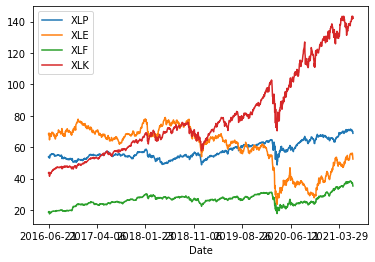

In [14]:
# Goal: Plot the price movements for each ETF

af_close.plot.line()

Cool! We plotted some data. Obviously this graph is quite messy. While messy and hard to read, it can still give us good insight into the relationships and trends present within our data. Seeing as that we are not presenting this to anyone, we can leave it messy for now and clean it up later.

Seaborn has plenty of good features for exploring data quickly and easily. We can create a pair plot to analyze the relationships within our df. 

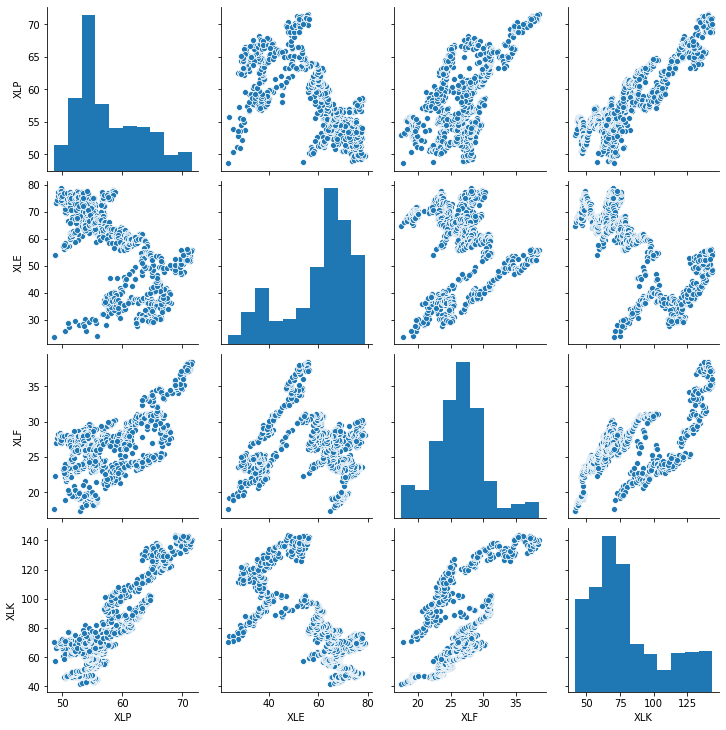

In [15]:
# Use a pairplot to examine the data

sns.pairplot(af_close)

As we can see above, the pair plot creates a grid of multiple graphs, each showign the relationship between two columns of our df. Additionally, where like columns are aligned, we get a histogram of that column.

If we examine our pair plot, nothing really sticks out. No two ETFs seem to be highly correlated. That makes sense - that all track different sectors and therefore should behave differently.

Another way to visualize correlations within our df is through a heatmap. This is a really easy plot to produce and, when we have lots of columns, it can help quickly point out strong relationships within our df.

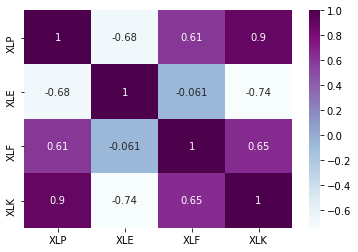

In [16]:
# Goal: Create a heatmap with Seaborn
sns.heatmap(af_close.corr(),cmap="BuPu",annot=True)

Of the possible relationships, XLF and XLK seem to be the most closely related. So, for the sake of this example, let's explore those two a little more. To do this, we will quickly create and plot a regression model of these two columns.

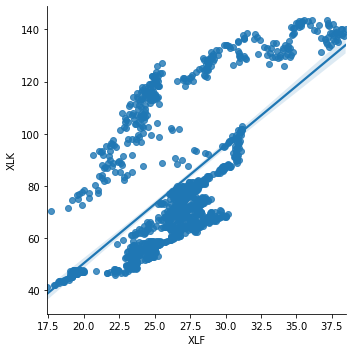

In [17]:
sns.lmplot(x='XLF',y='XLK',data=af_close)

### **Part 4: Questions**

Now that we have explored our data visually, we analyze it further by answering some basic questions about each fund. While there is really a limitless amount of questions to ask, for the sake of this example we will investigate these four:

  1. Which sector had the highest total return?
  2. Which sector had the lowest total return?
  3. Which sector is the most volatile?
  4. Which day was the best for each sector?
  5. Which day was the worst for each sector?

Answering these questions is pretty simple, and the insights they provide can lead to even more questions and better analysis. Let's get started.

> **1. Highest Return over the Period**

The way our data is structured does not immediately lend itself to answering this question. Our df shows daily closing prices only - it makes no mention of return. To account for this, we can create a new df called "returns" and calculate the return using [pct_change()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html).

In [18]:
# Goal: Creat a new df showing the return of each ETF

# Let's start with an empty df
returns = pd.DataFrame()

# Create the new df
for tick in tickers:
    returns[tick+' Return'] = af_close[tick].pct_change()

# View our result
returns.head()

,XLP Return,XLE Return,XLF Return,XLK Return
Date,,,,
2016-06-21,NaN,NaN,NaN,NaN
2016-06-22,0.000558,-0.005566,-0.000875,-0.003446
2016-06-23,0.006133,0.016497,0.021006,0.013601
2016-06-24,-0.019209,-0.032314,-0.053579,-0.038435
2016-06-27,-0.002071,-0.032046,-0.028533,-0.020104


This looks good! The first row is NaN and that makes sense - you can't calculate return until the second day. Let's graph this data to see how it looks:

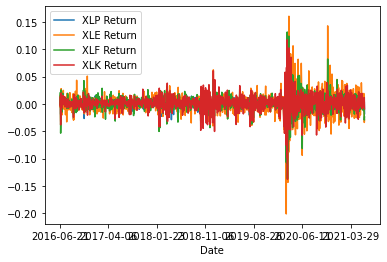

In [19]:
returns.plot.line()

This looks terrible, but that's okay! It helps us realize something important. A drawback of pct_change is that it is a running change - not cummulative. That is why the graph is so sporadic and each line seems to be right on top of the others. So, while pct_change() is nice, what we really need to do is calculate the cummulative percent changes. Let's try!

In [20]:
# Goal: Create a new df showing the cummulative returns for each ETF

# Start with our empty df
cummulative_return = pd.DataFrame()

# Calculate the running cummulative return
for tick in tickers:
    cummulative_return[tick+' Return'] = ((af_close[tick] - af_close[tick].iloc[0]) / af_close[tick].iloc[0] * 100)

# See if it worked    
cummulative_return.head()       

,XLP Return,XLE Return,XLF Return,XLK Return
Date,,,,
2016-06-21,0.000000,0.000000,0.000000,0.000000
2016-06-22,0.055787,-0.556611,-0.087451,-0.344585
2016-06-23,0.669394,1.083939,2.011358,1.010802
2016-06-24,-1.264412,-2.182508,-3.454303,-2.871583
2016-06-27,-1.468942,-5.317120,-6.209009,-4.824257


This looks like it worked! Hooray to us - a bunch of smart scientists already. Let's consult the graph:

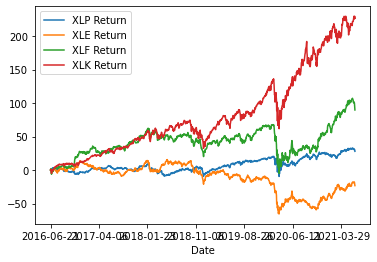

In [21]:
cummulative_return.plot.line()

Much, much better! Now we can see how each ETF has performed over the last five years. 

Better yet, now that our df shows the cummulative returns, we can easily answer our questions.

In case you forgot, our question is: **which ETF had the highest return over the time period?** 

To answer that, all we need to do is look at the last row of the data frame:

In [22]:
# Goal: see the last row of the df

cummulative_return.iloc[-1]

XLP Return     27.928606
XLE Return    -23.260581
XLF Return     89.628898
XLK Return    226.418560
Name: 2021-06-18, dtype: float64

That was wasy! As we can see, XLK had the highest return (~226%!).

> **2. Lowest Return over the Period**

This is easy now. Just reference the last line of code we ran and note that XLE had a total return of ~-23% over the period. Not good!

> **3. Which sector is the most volatile?**

We can measure volatility using standard deviation. For this, we want daily returns, not cummulative returns, so we will reference the "returns" df.

In [23]:
# Goal: Caluclate the standard deviation of each column of the "returns" df

returns.std()

XLP Return    0.010178
XLE Return    0.020800
XLF Return    0.015971
XLK Return    0.015206
dtype: float64

They are all pretty close, but XLE just barely manages to have the highest standard deviation and thus was the most volatile over the period.

It is important to be sure that we calculate standard deviation on the "returns" df, *not* the "af_close" df. 

In [24]:
returns.std()

XLP Return    0.010178
XLE Return    0.020800
XLF Return    0.015971
XLK Return    0.015206
dtype: float64

> **4. What was the best day and worst day for each sector?**

Here, we need to examine the "returns" df. That df shows daily returns, and each funds best day is simply the day in which its daily return was the highest. Luckily, we can use [.idxmax()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) to find this answer quite quickly.

In [25]:
# Goal: Find the index value corresponding to each columns maximum value

returns.idxmax()

XLP Return    2020-03-13
XLE Return    2020-03-24
XLF Return    2020-03-13
XLK Return    2020-03-13
dtype: object

Super easy! Now let's find the worst day. We can use [.idxmin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html) to find this answer quite quickly.

In [26]:
# Goal: Find the index value corresponding to each columns minimum value

returns.idxmin()

XLP Return    2020-03-12
XLE Return    2020-03-09
XLF Return    2020-03-16
XLK Return    2020-03-16
dtype: object

And just like that we are done! All of our questions are answered and we are all stars. But, we're inquisitive scientists and we are interested in some of our results.

If we compare the best and worst days of each fund, we can see that they all happen within a very short amount of time. This is odd given that the timeframe of our data is 5 years. When we consult a calendar, we note that the 13th and 16th were a Friday and Monday, respectively. That means that the best days for both XLF and XLK were immediately followed by their worst days. What a wild world! 

It turns out these days represent the onset of the Corona Virus panic. As such, markets reacted very wildly.

If you'd like to read a little more about the volatility in the markets that day, I recommned this article from the Wall Street Journal:

> **[The Day Coronavirus Nearly Broke the Financial Markets](https://www.wsj.com/articles/the-day-coronavirus-nearly-broke-the-financial-markets-11589982288)**